In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
from io import BytesIO
from six.moves import urllib
from tensorflow.keras.applications import inception_v3, InceptionV3
tf.__version__

'1.13.1'

## Inception V3 architecture to predict ImageNet classes

In [2]:
model = InceptionV3(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.
96116736/96112376 [==============================] - 165s 2us/step


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [4]:
k = model.get_layer("input_1")
k.input

<tf.Tensor 'input_1:0' shape=(?, 299, 299, 3) dtype=float32>

In [5]:
img = plt.imread("Images/french-horn.jpg")
img.shape

(144, 150, 3)

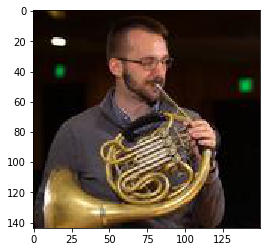

In [6]:
plt.imshow(img)

In [8]:
pimg = inception_v3.preprocess_input(np.expand_dims(img.astype(float), axis=0))
print(np.min(img), np.max(img))
print(np.min(pimg), np.max(pimg))

0 255
-1.0 1.0


### predict and decode

In [ ]:
pred = model.predict(pimg)
pred.shape

In [ ]:
print("highest probabilities", np.sort(pred[0])[::-1][:10])
print("highest class codes  ", np.argsort(pred[0])[::-1][:10])

In [ ]:
from tensorflow.keras.applications.inception_v3 import decode_predictions

print('Predicted:', decode_predictions(pred, top=5))

### occlusion at random

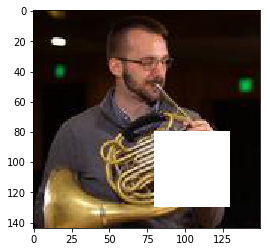

In [20]:
oimg = img.copy()
w,h=50,50
bx,by = np.random.randint(img.shape[1]-w), np.random.randint(img.shape[0]-h)
#bx,by=80,80
#bx,by=20,90
oimg[by:by+h,bx:bx+w]=np.max(oimg)
p = oimg[by:by+h,bx:bx+w,:]
plt.imshow(oimg)

observe how prediction probabilities change when occlusion happens on the key object. Try also the following:

- bx=80 and by=80
- bx=20 and by=90 

what part of the instrument is more responsible for the CNN classification?

In [21]:
pimg = inception_v3.preprocess_input(np.expand_dims(oimg.astype(float), axis=0))
pred = model.predict(pimg)
print('Predicted:', decode_predictions(pred, top=5))

Predicted: [[(u'n02672831', u'accordion', 1.0), (u'n01677366', u'common_iguana', 1.700162e-15), (u'n04141076', u'sax', 2.536374e-17), (u'n02804610', u'bassoon', 1.5953617e-18), (u'n03249569', u'drum', 3.2179111e-21)]]
